In [1]:


import sys
from PIL import Image
from saliency.dataset import SaliencyDataset
from saliency.metrics import SEQUENTIAL_METRICS, make_engine, multi_match
import numpy as np
from scipy.special import erf


import matplotlib as mlt
import matplotlib.pyplot as plt
import cycler

def intersection(mean_1, std_1, mean_2, std_2):
	def C(mean_1, std_1, mean_2, std_2):
			var_1 = std_1 **2
			var_2 = std_2 **2
			c  = (mean_2 * var_1) - \
					 (std_2 *
					 	(
					 		(mean_1 * std_2) +
					 		std_1 * np.sqrt(
					 			np.power(mean_1-mean_2,2) +
					 			(2 * (var_1 - var_2) * np.log(std_1/std_2))
					 	)
					 )
					 )
			return c / (var_1 - var_2)
	c = C(mean_1, std_1, mean_2, std_2)
	result = 1 - \
			(0.5 * erf((c - mean_1) / (np.sqrt(2)*std_1))) + \
			(0.5 * erf((c - mean_2) / (np.sqrt(2)*std_2)))
	return result

In [ ]:
metrics = SEQUENTIAL_METRICS


metrics_names = ['EUC', 'MAN', 'EYE', 'LEV', 'SMT', 'HAU', 'FRE', 'DTW']
metrics_names += ['TDE', 'REC', 'DET', 'LAM', 'CORM', 'MM_S', 'MM_A']
metrics_names += ['MM_L', 'MM_P', 'MM_D']




dataset = SaliencyDataset()
dataset.load('OSIE')
target = dataset.get('heatmap_path')
dataset_size = len(dataset)
seqs = dataset.get('sequence', modify='remove')

eng = make_engine()

io_h_h = np.zeros((len(dataset), 15, 14, len(metrics) + 4))
io_f_h = np.zeros((len(dataset), 15, 14, len(metrics) + 4))
io_h_h_f = np.zeros((len(dataset), 15, 15, 14, len(metrics) + 4))

path = '/home/ramin/codes/SaliencyBundle/results/OSIE/'


total = list()
for img in seqs:
    for seq in img:
        if len(seq) > 3:
            total.append(seq)
        



In [ ]:



for img_idx, img in enumerate(seqs):
	print(img_idx)
	img_size = dataset.data[img_idx]['img_size']
	for f_count in range(15):
		for main_user_idx, main_user in enumerate(img):
			s = set(range(len(img))) - set([main_user_idx])
			for i in range(f_count):
				x = s.pop()
			gt = [img[idx] for idx in s]
			for i in range(f_count):
				gt.append(np.random.choice(total, 1)[0])
			gt = np.array(gt)
			for user_idx, user in enumerate(gt):
				for metric_idx, metric in enumerate(metrics):
						tmp = metric(P=main_user[:,:2], Q=user[:,:2],
								height=img_size[0], width=img_size[1], matlab_engine=eng,threshold=3.5*24)
						if isinstance(np.array(tmp).flatten(), np.float64):
							print(img_idx, main_user_idx, user_idx, metric_idx)
						if metric != multi_match:
							io_h_h_f[img_idx, f_count, main_user_idx, user_idx, metric_idx] = tmp
						else:
							io_h_h_f[img_idx, f_count, main_user_idx, user_idx, metric_idx:] = np.array(tmp).flatten()

                            

with open('results/io_h_h_f.npz', 'wb') as f:
	np.save(f, io_h_h_f)





In [43]:

metrics_names = ['EUC', 'MAN', 'EYE', 'LEV', 'SMT', 'HAU', 'FRE', 'DTW']
metrics_names += ['TDE', 'REC', 'DET', 'LAM', 'CORM', 'MM_S', 'MM_A']
metrics_names += ['MM_L', 'MM_P', 'MM_D']


# io_h_h_f = np.load('results/io_h_h_f.npz')

x = io_h_h_f.copy()
x[x==0] = np.nan

mask_io = np.isnan(x[:,0,:,:,:])


intsection = np.zeros((len(metrics_names), 15))
intsection_spp = np.zeros((len(metrics_names), 15))


for metric_idx, metric in enumerate(metrics_names):
	for i in range(15):
		# mask = np.logical_or(mask_io[:,:,:, metric_idx], np.isnan(x[:,i,:,:,metric_idx]))
		mean_1 = np.nanmean(x[:,0,:,:,metric_idx], axis=(0,1,2))
		std_1 = np.nanstd(x[:,0,:,:,metric_idx], axis=(0,1,2))

		mean_2 = np.nanmean(x[:,i,:,:,metric_idx], axis=(0,1,2))
		std_2 = np.nanstd(x[:,i,:,:,metric_idx], axis=(0,1,2))

		intsection[metric_idx, i] = intersection(mean_1, std_1, mean_2, std_2)

        
for metric_idx, metric in enumerate(metrics_names):
	for i in range(15):
		# mask = np.logical_or(mask_io[:,:,:, metric_idx], np.isnan(x[:,i,:,:,metric_idx]))
		mean_1 = np.nanmean(np.nanmin(x[:,0,:,:,metric_idx], axis=2), axis=(0,1))
		std_1 = np.nanstd(np.nanmin(x[:,0,:,:,metric_idx], axis=2), axis=(0,1))

		mean_2 = np.nanmean(np.nanmin(x[:,i,:,:,metric_idx], axis=2), axis=(0,1))
		std_2 = np.nanstd(np.nanmin(x[:,i,:,:,metric_idx], axis=2), axis=(0,1))

		intsection_spp[metric_idx, i] = intersection(mean_1, std_1, mean_2, std_2)







/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: All-NaN slice encountered
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: All-NaN slice encountered
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: All-NaN slice encountered
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: All-NaN slice encountered


In [46]:
intsection[:,0] = 1
intsection_spp[:,0] = 1

In [ ]:
with open('results/intsection_imposter.npz', 'wb') as f:
	np.save(f, intsection)
    
with open('results/intsection_imposter_spp.npz', 'wb') as f:
	np.save(f, intsection_spp)

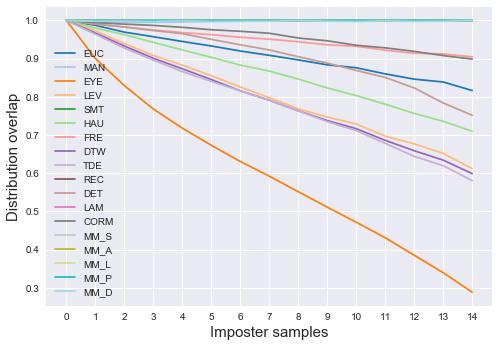

In [47]:

fig, ax = plt.subplots()
plt.style.use('seaborn')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Imposter samples', fontsize=15)
ax.set_ylabel('Distribution overlap', fontsize=15)
ax.set_xticks(range(16))
ax.set_xticklabels(range(16))
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels([str(round(item,1)) for item in np.arange(0, 1.1, 0.1)])

# colors = ['#FFFFE5', '#F7FCB9', '#D9F0A3', '#ADDD8E', '#78C679', 
	# '#41AB5D', '#238443', '#005A32']

font = {'family' : 'normal',
		# 'weight' : 'bold', 
		'size'   : 16
}



cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1.0, 18))



for row_idx, row in enumerate(intsection):
	ax.plot(range(15),intsection[row_idx], label=metrics_names[row_idx], color=colors[row_idx])

ax.legend()
ax.grid(True)
plt.savefig('figs/imposter_intsection.png', format='png', dpi=600)


# plt.show()


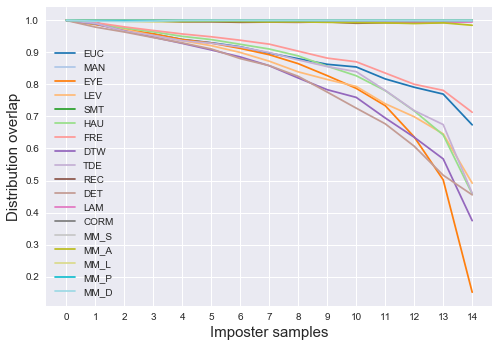

In [46]:


fig, ax = plt.subplots()
plt.style.use('seaborn')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Imposter samples', fontsize=15)
ax.set_ylabel('Distribution overlap', fontsize=15)
ax.set_xticks(range(16))
ax.set_xticklabels(range(16))
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels([str(round(item,1)) for item in np.arange(0, 1.1, 0.1)])


font = {'family' : 'normal',
		# 'weight' : 'bold', 
		'size'   : 16
}


cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1.0, 18))


for row_idx, row in enumerate(intsection):
	ax.plot(range(15),intsection_spp[row_idx], label=metrics_names[row_idx], color=colors[row_idx])

ax.legend()
ax.grid(True)
plt.savefig('figs/imposter_intsection_spp.png', format='png', dpi=600)



